<a href="https://colab.research.google.com/github/zyuneee/portfolio/blob/main/%EC%9D%98%EB%A5%98%EC%82%AC%EC%A7%84%EA%B5%AC%EB%B6%84_AI%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

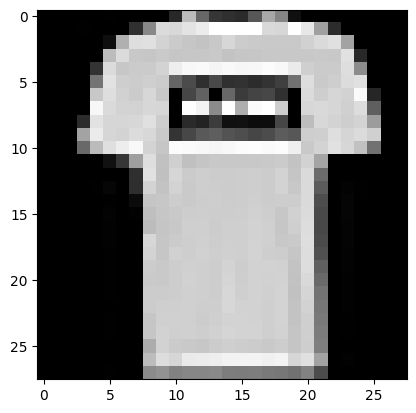

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


#미리 이미지띄우는법



(trainX, trainY),(testX, testY)= tf.keras.datasets.fashion_mnist.load_data()

plt.imshow(trainX[1])
plt.gray()

#이미지값 줄여서 넣기
trainX = trainX / 255.0
testX = testX/ 255.0

trainX.reshape((trainX.shape[0],28,28,1))
testX.reshape((testX.shape[0],28,28,1))


class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [5]:
#모델만들기모델만들기
model= tf.keras.Sequential([
    #tf.keras.layers.Dense(128,input_shape=(28,28),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),
                           padding='same',
                           activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax'),
])


#모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(trainX,trainY,epochs=5)

#모델 학습하면서 평가도 한 번씩 진행함
#validation accuracy 높일 방법을 찾아보자 (1.dense layer 추가해볼까, 2.conv+pooling 추가해볼까?)
#overfitting 적은 선에서 모델 마무리할 수 있는 장점이 있다. last test 전에
#model.fit(trainX,trainY, Validation_data=(textX, testY), epochs=5)

#모델 평가(채점)
#score = model.evaluate(testX,testY)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8009 - loss: 0.5760
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8945 - loss: 0.2976
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9065 - loss: 0.2594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9126 - loss: 0.2420
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9201 - loss: 0.2234
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9065 - loss: 0.2731
[0.2704373896121979, 0.9053999781608582]
